In [3]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# preprocessing 


Dimensionality_reduction

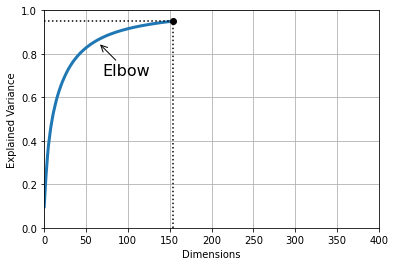

In [27]:
import matplotlib.pyplot as plt
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_reduced=pca.fit_transform(X_train)

In [18]:
x_test_reduced=pca.transform(X_test)

In [10]:
X_reduced.shape

(60000, 154)

# training the model

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [13]:
import time
t0=time.time()
rfc.fit(X_reduced,y_train)
t1=time.time()

In [15]:
print(f"training took {t1-t0}")

training took 99.32497453689575


# evaluation

In [19]:
from sklearn.metrics import accuracy_score
y_pred=rfc.predict(x_test_reduced)
score=accuracy_score(y_test,y_pred)
score

0.9482

# comaparing this with the unreduced data

In [21]:
import time
t2=time.time()
rfc.fit(X_train,y_train)
t3=time.time()


In [22]:
print(f"training took {t3-t1}")

training took 53.088319301605225


# evaluation on unreduced test set

In [24]:
y_pred1=rfc.predict(X_test)
score=accuracy_score(y_test,y_pred1)
score

0.9701

# Summary

so,the reduced model is not good in predicting rather the original data is performing well as we could see throuth their accuracy scores 